In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\multiple_linear_regression_datase_2.csv")
df.head()

,Age,Experience,Income
0,59,2,40437
1,49,11,51511
2,35,1,26996
3,28,11,45548
4,41,11,53926


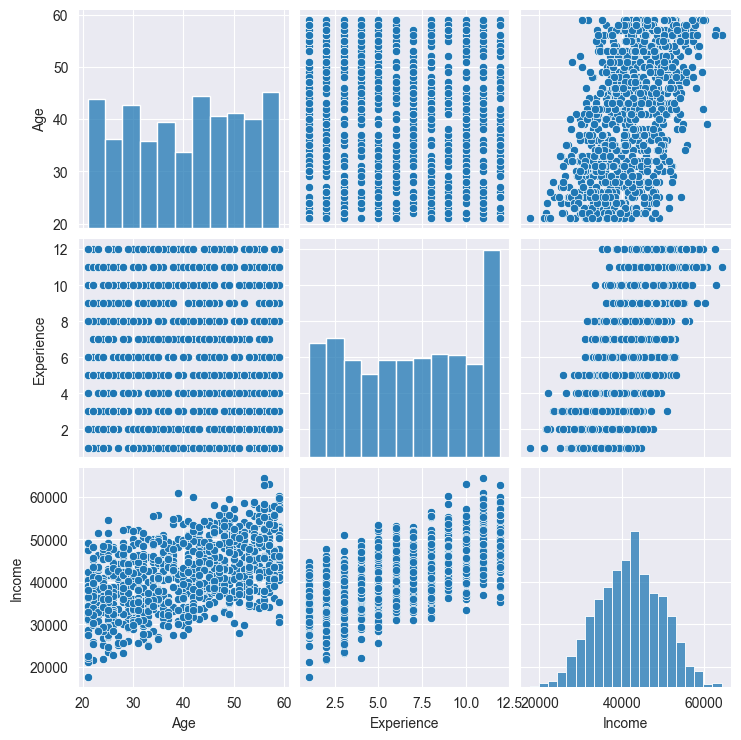

In [5]:
sns.pairplot(df)
plt.show()

## Modeling 

In [7]:
x = df.iloc[:,:-1]
y = df['Income']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
knn = KNeighborsRegressor(n_neighbors=5, p=2)
knn.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [27]:
# Score
train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test) 
result = [[train_score, test_score]]

result_df = pd.DataFrame(result, columns=["Train_Score", "Test_Score"])
result_df

,Train_Score,Test_Score
0,0.775019,0.66862


In [17]:
# STORE RESULTS
results = []

for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k, p=1)  # p=1 → Manhattan_distance and  p=2 → Euclidean distance
    knn.fit(x_train, y_train)

    train_acc = round(knn.score(x_train, y_train) * 100, 2)
    test_acc = round(knn.score(x_test, y_test) * 100, 2)

    results.append([k, train_acc, test_acc])

# CREATE DATAFRAME
result_df = pd.DataFrame(
    results,
    columns=["K_Neighbors", "Train_Accuracy", "Test_Accuracy"]
)

# ACCURACY DIFFERENCE
result_df["Accuracy_Diff_Neg"] = (
    result_df["Train_Accuracy"] - result_df["Test_Accuracy"]
)

# Absolute difference (generalization gap)
result_df["Accuracy_Diff_Abs"] = result_df["Accuracy_Diff_Neg"].abs()

# SORT RESULTS (BEST GENERALIZATION FIRST)
result_df_sorted = (
    result_df
    .sort_values(by="Accuracy_Diff_Abs", ascending=True)
    .reset_index(drop=True)
)

# SHOW ONLY NEGATIVE DIFFERENCE VALUES
result_df_sorted["Accuracy_Diff_Neg"] = (
    result_df_sorted["Accuracy_Diff_Neg"]
    .apply(lambda x: f"{x:.2f}" if x < 0 else "")
)

# REORDER COLUMNS
result_df_sorted = result_df_sorted[
    [
        "K_Neighbors",
        "Train_Accuracy",
        "Test_Accuracy",
        "Accuracy_Diff_Abs",
        "Accuracy_Diff_Neg"
    ]
]

result_df_sorted


,K_Neighbors,Train_Accuracy,Test_Accuracy,Accuracy_Diff_Abs,Accuracy_Diff_Neg
0,26,72.69,72.61,0.08,
1,25,72.78,72.70,0.08,
2,24,72.69,72.38,0.31,
3,20,73.16,72.78,0.38,
4,27,72.39,72.86,0.47,-0.47
5,23,72.90,72.41,0.49,
6,29,72.17,72.71,0.54,-0.54
7,18,73.32,72.70,0.62,
8,22,72.86,72.21,0.65,
9,28,72.13,72.81,0.68,-0.68


In [16]:
# STORE RESULTS
results = []

for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k, p=2)  # p=1 → Manhattan_distance and  p=2 → Euclidean distance
    knn.fit(x_train, y_train)

    train_acc = round(knn.score(x_train, y_train) * 100, 2)
    test_acc = round(knn.score(x_test, y_test) * 100, 2)

    results.append([k, train_acc, test_acc])

# CREATE DATAFRAME
result_df = pd.DataFrame(
    results,
    columns=["K_Neighbors", "Train_Accuracy", "Test_Accuracy"]
)

# ACCURACY DIFFERENCE
result_df["Accuracy_Diff_Neg"] = (
    result_df["Train_Accuracy"] - result_df["Test_Accuracy"]
)

# Absolute difference (generalization gap)
result_df["Accuracy_Diff_Abs"] = result_df["Accuracy_Diff_Neg"].abs()

# SORT RESULTS (BEST GENERALIZATION FIRST)
result_df_sorted = (
    result_df
    .sort_values(by="Accuracy_Diff_Abs", ascending=True)
    .reset_index(drop=True)
)

# SHOW ONLY NEGATIVE DIFFERENCE VALUES
result_df_sorted["Accuracy_Diff_Neg"] = (
    result_df_sorted["Accuracy_Diff_Neg"]
    .apply(lambda x: f"{x:.2f}" if x < 0 else "")
)

# REORDER COLUMNS
result_df_sorted = result_df_sorted[
    [
        "K_Neighbors",
        "Train_Accuracy",
        "Test_Accuracy",
        "Accuracy_Diff_Abs",
        "Accuracy_Diff_Neg"
    ]
]

result_df_sorted


,K_Neighbors,Train_Accuracy,Test_Accuracy,Accuracy_Diff_Abs,Accuracy_Diff_Neg
0,24,72.62,72.70,0.08,-0.08
1,25,72.57,72.69,0.12,-0.12
2,27,72.17,72.37,0.20,-0.20
3,26,72.48,72.68,0.20,-0.20
4,28,72.22,72.59,0.37,-0.37
5,22,72.77,72.39,0.38,
6,23,72.80,72.35,0.45,
7,20,73.28,72.61,0.67,
8,29,72.01,72.78,0.77,-0.77
9,21,73.13,72.34,0.79,


# Final Model

In [30]:
knn = KNeighborsRegressor(n_neighbors=25, p=1)
knn.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",25
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",1
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [31]:
train_score = knn.score(x_train, y_train)
test_score = knn.score(x_test, y_test) 
result = [[train_score, test_score]]

result_df = pd.DataFrame(result, columns=["Train_Score", "Test_Score"])
result_df

,Train_Score,Test_Score
0,0.727785,0.727014


C:\Users\Hello\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Hello\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


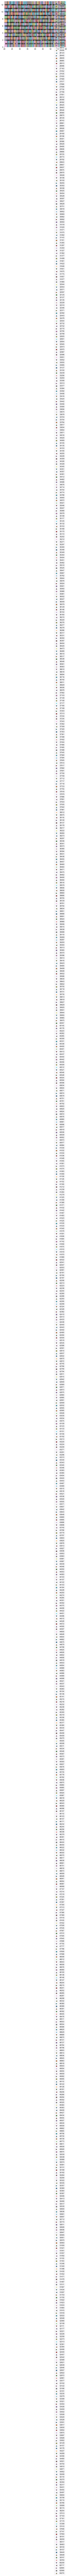

In [32]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)
plt.show()